What need:
1) Forward Problem: Solve the heat equation using FDM (Euler or Thomas methods) to find the temperature distribution u(x,T) at a later time T given the initial condition f(x).

2) Inverse Problem: Use the temperature distribution u(x,T) (which will be noisy) to recover the initial condition f(x) using Gradient Descent with Tichonov regularization.


Forward Problem:
1. Implement forward problem calculation +
2. Add noise to u(x,T) fot further use in the Inverse Problem +
3. Plot noisy and real u(x,T) +

Inverse Problem:
1. Implement Inverse problem estimation using Gradient Descent with Tichonov regularization
2. Play with different eta values
3. Plot the true initial condition, and the recovered initial condition using Gradient Descent with Tichonov regularization for comparison

PS: "+" symbol it means I did it. Don't pay attention to it. This is done for my convenience

### Heat equation:
∂u(x,t) / ∂t = α * ( ∂^2^u(x,t) / ∂x^2^ ) + f(x, t)
f(x, t) - external influence
α - coefficient of thermal conductivity (constant)
u(x,t) - temperature at point x at time t
where x = [0, L], t = [0, T]

### Boundary condition:
u(0, t) = u(L, t) = 0 (when x = 0 and x = L temperature is equal to 0)

### Initial condition:
u(x, 0) = f(x) - so, i don't understand it normally (the temperature distribution f(x) along the rod at time t = 0)

### CMF condition:
 r = α * dt / dx^2^

### Spatial Diser:
 dx = L / n - 1,
 where n - amount of step in grid (or space)? or amount of points

### Time Diser:
 dt = T / m - 1 (I'm not sure about m - 1, think we don't need to subtract 1)




In [116]:
import numpy as np
import matplotlib.pyplot as plt

### In Lecture Given Parameters

In [136]:
T = 0.1 # time
L = 1.0 # lentgth
alpha = 0.01 # k / c * ro
noise_level = 0.01 # noise of order 2 * 10^-2
lambda_reg = 0.0001
eta = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5] # Learning rate
Nx = 50
Nt = 100
dx = L / (Nx - 1) # step X (Horizontal)
dt = T / (Nt - 1) # step T (Vertical)

### Initial function:
    f(x) = sin(Pi * X)

In [118]:
def fun(x):
    return np.sin(np.pi * x)

### Grid Method:
construct the grid over the domain = (0, L) * (0, T)

In [119]:
print(f"dx: {dx}, dt: {dt}")

dx: 0.02040816326530612, dt: 0.00101010101010101


In [120]:
r = alpha * dt / dx**2

### We need some condition for CMF (r):

by CFL condition r <= 0.5
so



In [121]:
if r > 0.5:
    print("CFL condition not approved")
else:
    print(f"{r} < or = 0.5")

0.024252525252525258 < or = 0.5


### Construct grid

In [122]:
x = np.linspace(0, L, Nx)
x

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

### Euler Method

In [123]:
u = np.zeros((Nt, Nx))  # Our array function
u

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [124]:
u[0, :] = fun(x) # Function when t=0
u

array([[0.00000000e+00, 6.40702200e-02, 1.27877162e-01, ...,
        1.27877162e-01, 6.40702200e-02, 1.22464680e-16],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

## Euler method:

u<sub>n + 1, i</sub> = u<sub>n, i</sub> + alpha * (dt / dx^2^) * (u<sub>n, i - 1</sub> - 2 * u<sub>n, i</sub> + u<sub>n, i + 1</sub>)


In [125]:
for n in range(0, Nt - 1):
    for i in range(1, Nx - 1):
        u[n + 1, i] = u[n, i] + alpha * dt / dx**2 * (u[n, i - 1] - 2 * u[n, i] + u[n, i + 1])

In [126]:
u

array([[0.00000000e+00, 6.40702200e-02, 1.27877162e-01, ...,
        1.27877162e-01, 6.40702200e-02, 1.22464680e-16],
       [0.00000000e+00, 6.40638348e-02, 1.27864418e-01, ...,
        1.27864418e-01, 6.40638348e-02, 0.00000000e+00],
       [0.00000000e+00, 6.40574503e-02, 1.27851675e-01, ...,
        1.27851675e-01, 6.40574503e-02, 0.00000000e+00],
       ...,
       [0.00000000e+00, 6.34538126e-02, 1.26646880e-01, ...,
        1.26646880e-01, 6.34538126e-02, 0.00000000e+00],
       [0.00000000e+00, 6.34474889e-02, 1.26634258e-01, ...,
        1.26634258e-01, 6.34474889e-02, 0.00000000e+00],
       [0.00000000e+00, 6.34411658e-02, 1.26621638e-01, ...,
        1.26621638e-01, 6.34411658e-02, 0.00000000e+00]])

## Add some noise

In [127]:
u_noisy = u[-1, :] + noise_level * np.random.randn(Nx)
u_noisy

array([ 0.01153584,  0.06550043,  0.14227293,  0.19869968,  0.25603616,
        0.30560716,  0.3875136 ,  0.41547527,  0.48211763,  0.53449163,
        0.58769687,  0.64785499,  0.7011636 ,  0.73569218,  0.78988927,
        0.80767519,  0.85330049,  0.87015104,  0.91803633,  0.92414596,
        0.95297981,  0.97245807,  0.98015561,  0.98584645,  0.99470826,
        0.98706777,  0.99044656,  0.97946354,  0.96904277,  0.93975693,
        0.93108543,  0.90204877,  0.87071089,  0.83457298,  0.80834668,
        0.77355549,  0.73283917,  0.67645429,  0.63368277,  0.59459711,
        0.53635893,  0.49285125,  0.43280196,  0.38285583,  0.30174584,
        0.24456913,  0.18252366,  0.12984286,  0.07923956, -0.0106016 ])

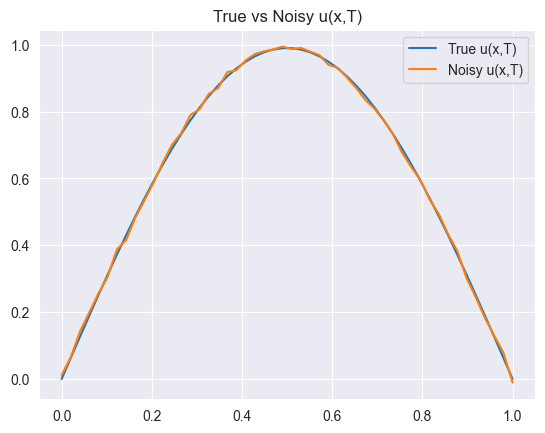

In [128]:
plt.plot(x, u[-1, :], label='True u(x,T)')
plt.plot(x, u_noisy, label='Noisy u(x,T)')
plt.legend()
plt.title('True vs Noisy u(x,T)')
plt.show()

### Now, Inverse
#### Implementation of Inverse Problem with GradientTikhonov Regularization

##### Gradient descent update rule:
    f^k+1^ = f^k^−η∇J(f^k^)

In [144]:
#### Fucntion to solve forward problem
def solve_forward(fun):
    u = np.zeros((Nt, Nx))
    u[0, :] = fun

    for n in range(0, Nt - 1):
        for i in range(1, Nx - 1):
            u[n + 1, i] = u[n, i] + alpha * dt / dx**2 * (u[n, i - 1] - 2 * u[n, i] + u[n, i + 1])

    return u

In [145]:
# Gradient Descent with Tikhonov Regularization
def gradient(eta, max_iters, epsilon):
    f = np.copy(u_noisy) # regularization term
    for iteration in range(max_iters):
        prediction_fun = solve_forward(f)

        # Formula:
        # ∇J(x) = 2 * (F(x) - y) * ∇F(x) + lambda * ∇R(x)
        # R(x) - regularization term
        # lavmbda - regularization parameter
        gradient = 2 * (prediction_fun[-1, :] - u_noisy) + 2 * lambda_reg * f

        # Update condition:
        #f(k+1) = f(k) − η * ∇J(f^{(k+1)})
        # η - learning rate
        f_new = f - eta * gradient

        if np.linalg.norm(f_new - f) < epsilon:
            print(f"Converged after {iteration} iterations.")
            break

        f = f_new

    return f

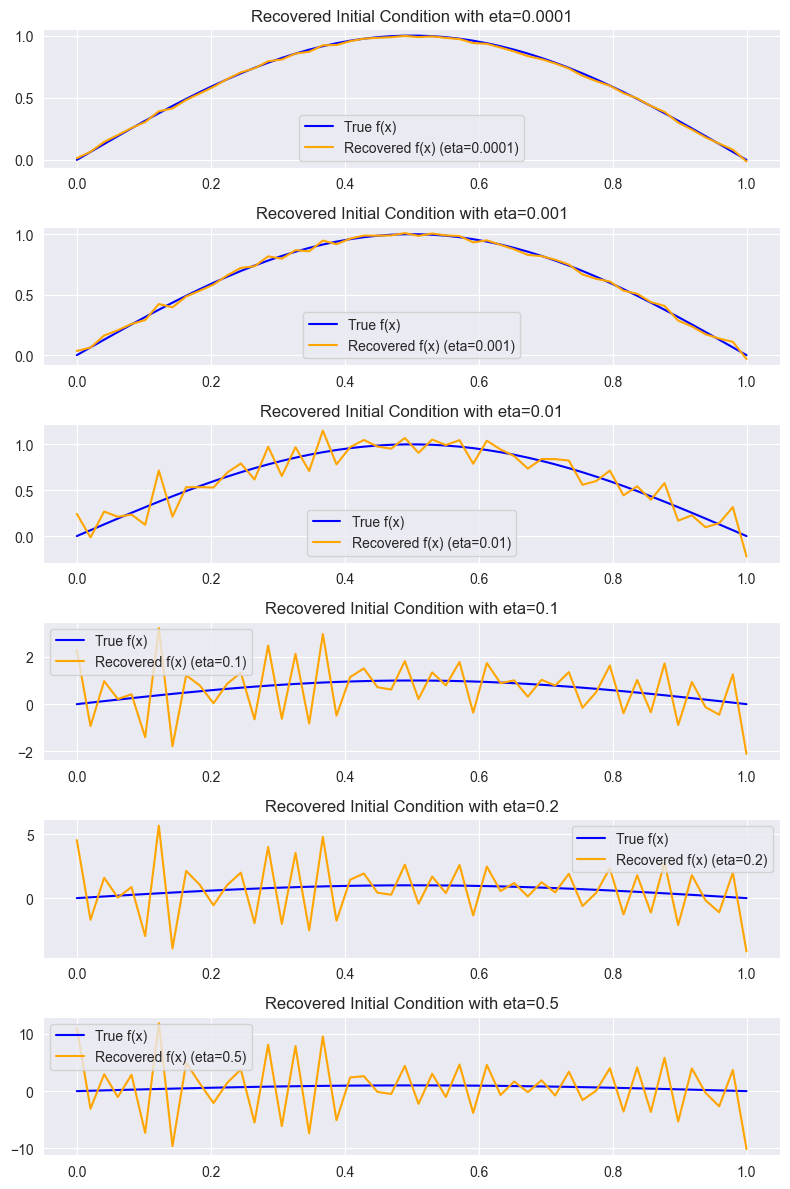

In [147]:
fig, ax = plt.subplots(len(eta), figsize=(8, 12))

for idx, learning_rate in enumerate(eta):
    f_recovered = gradient(learning_rate, 1000, epsilon = 1e-6)

    ax[idx].plot(x, fun(x), label='Our function', color='blue')
    ax[idx].plot(x, f_recovered, label=f'Recovered function (eta={learning_rate})', color='orange')
    ax[idx].set_title(f'Recovered Function with eta={learning_rate}')
    ax[idx].legend()


plt.tight_layout()
plt.show()